In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('/content/loan_approval_dataset.csv')


In [3]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
data.describe(include = "all")

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269,4269,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Graduate,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approved
freq,NaN,NaN,2144,2150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2656
mean,2135.000000,2.498712,NaN,NaN,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,NaN
std,1232.498479,1.695910,NaN,NaN,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,NaN
min,1.000000,0.000000,NaN,NaN,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,NaN
25%,1068.000000,1.000000,NaN,NaN,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,NaN
50%,2135.000000,3.000000,NaN,NaN,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,NaN
75%,3202.000000,4.000000,NaN,NaN,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,NaN


In [6]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [7]:
data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [8]:
data[data.duplicated()]

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status


In [9]:
data.drop_duplicates()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [10]:
cat_cols = ['education', 'self_employed','loan_status']

In [11]:
num_cols = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value']

In [12]:
data = data.drop(['loan_id'], axis=1)

In [13]:
data.columns
data.columns = data.columns.str.replace(' ', '')


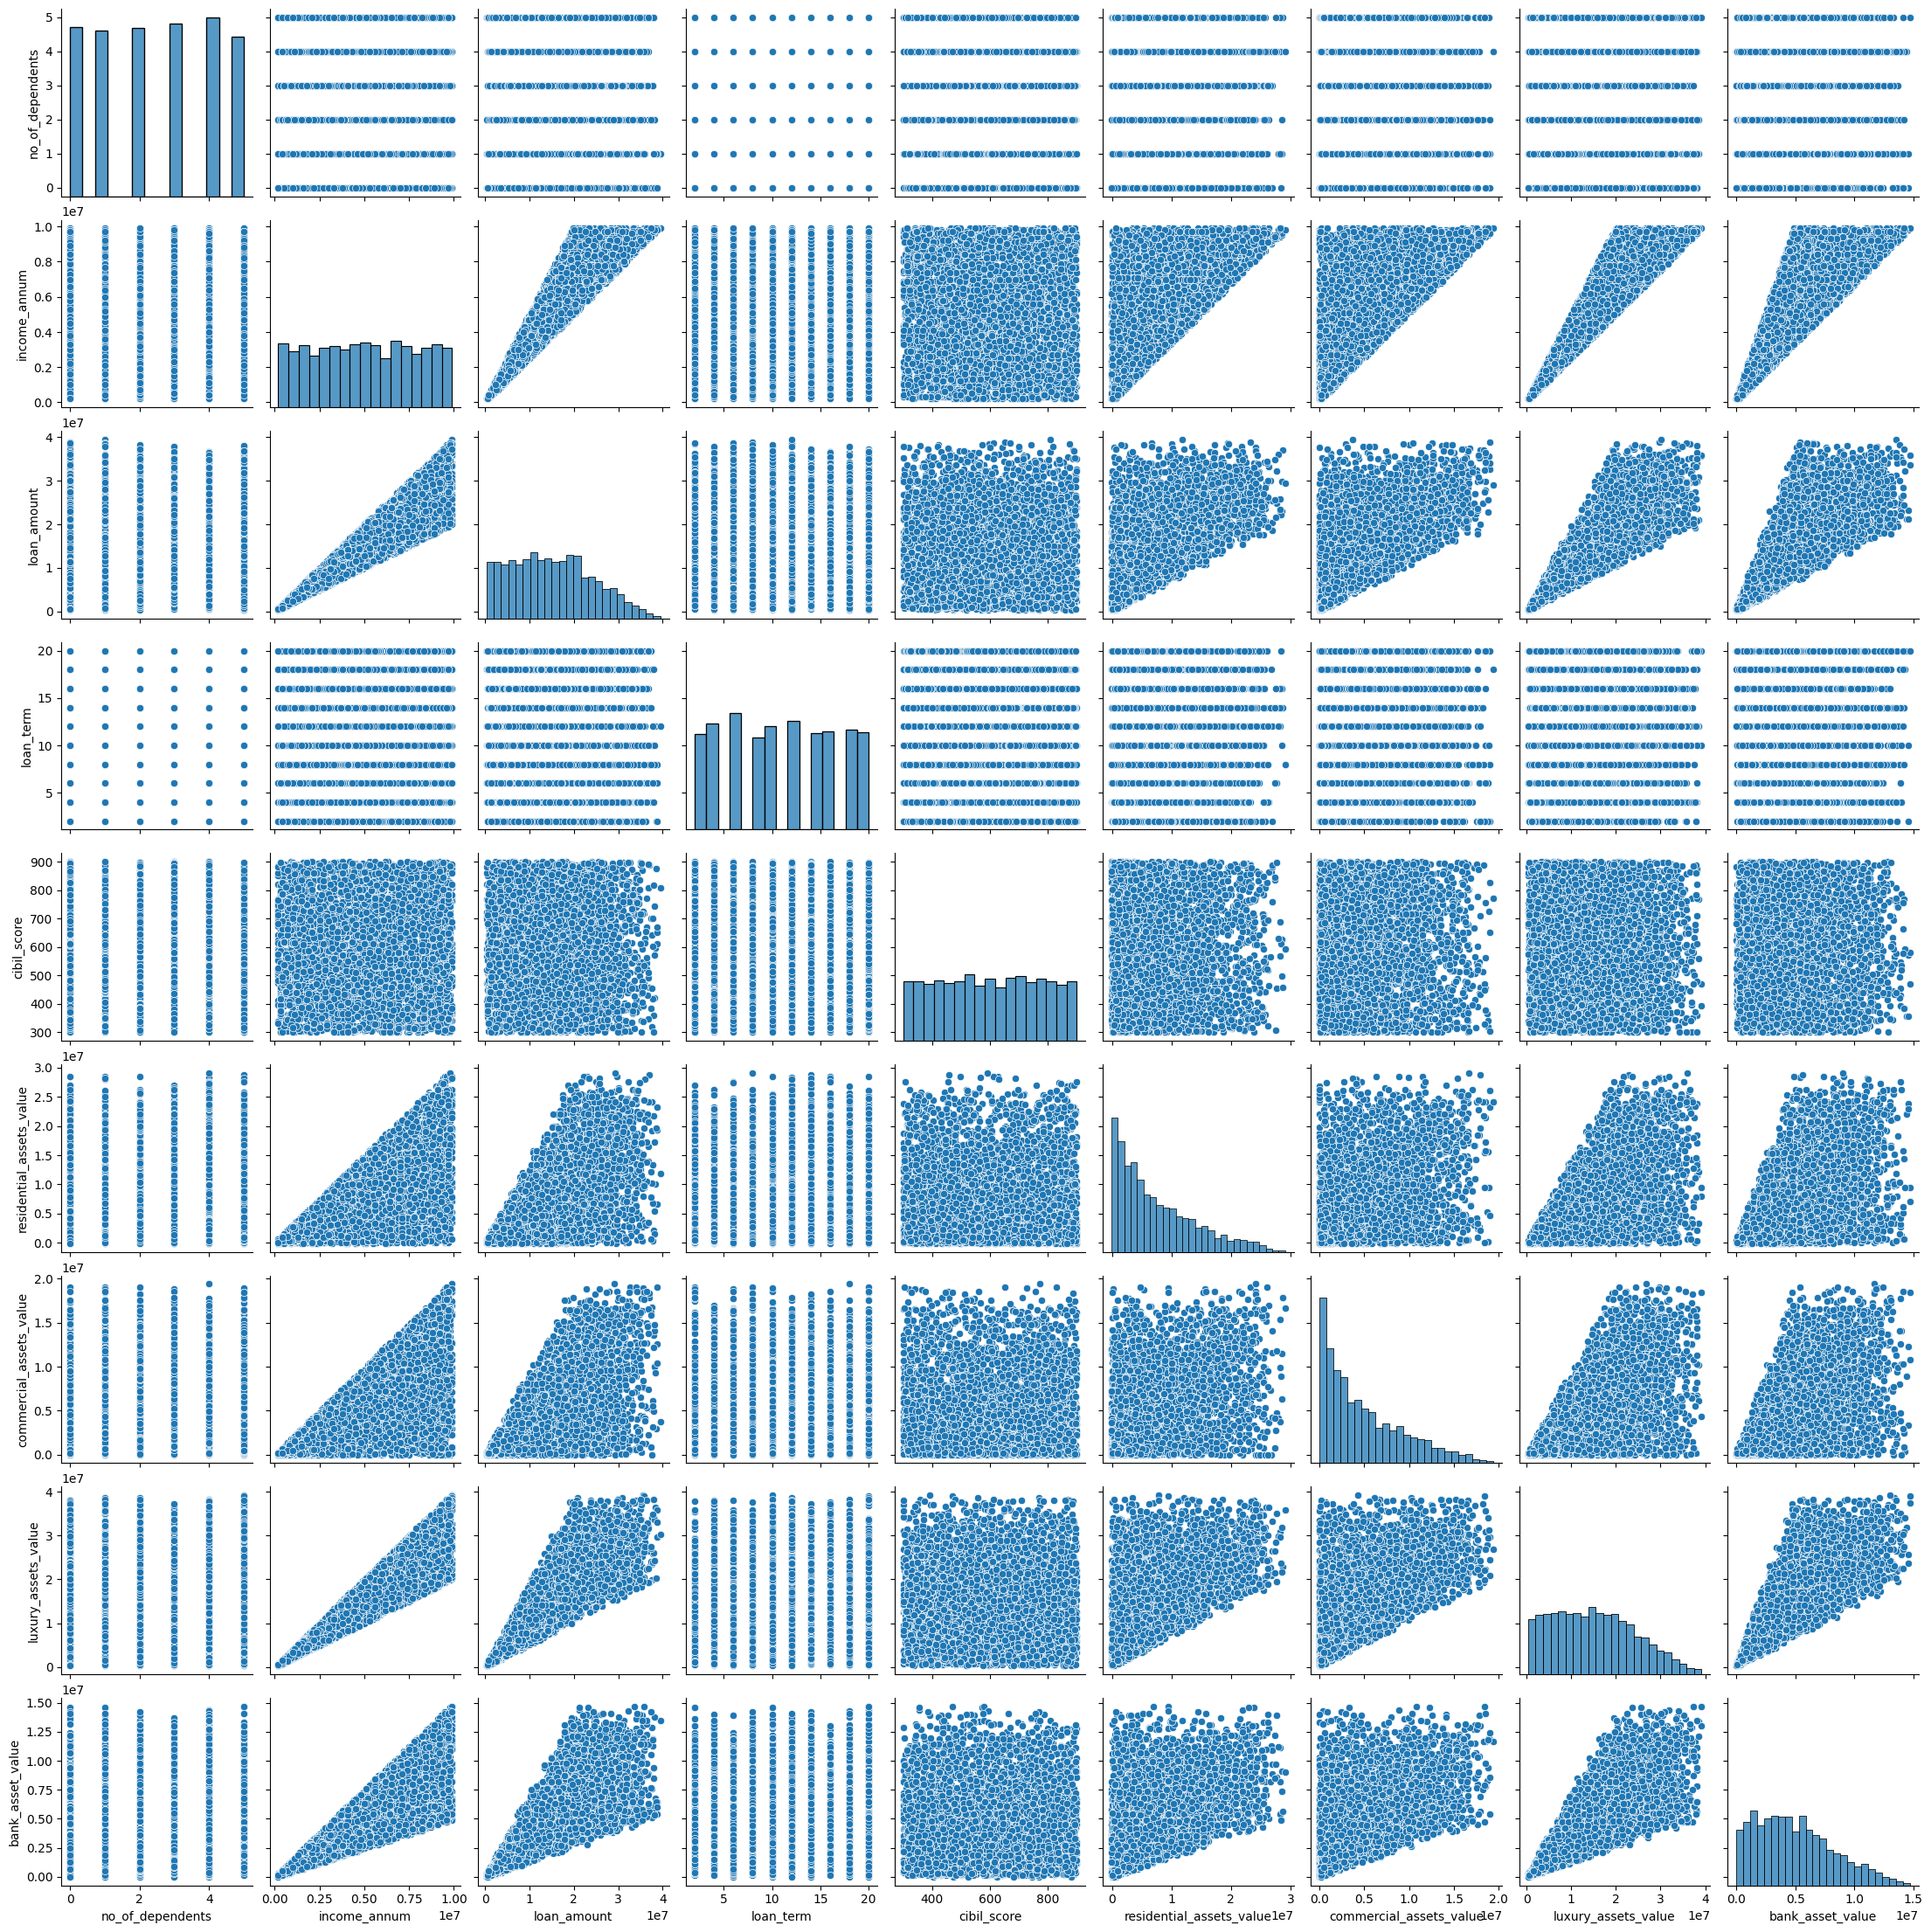

In [14]:
sns.pairplot(data)

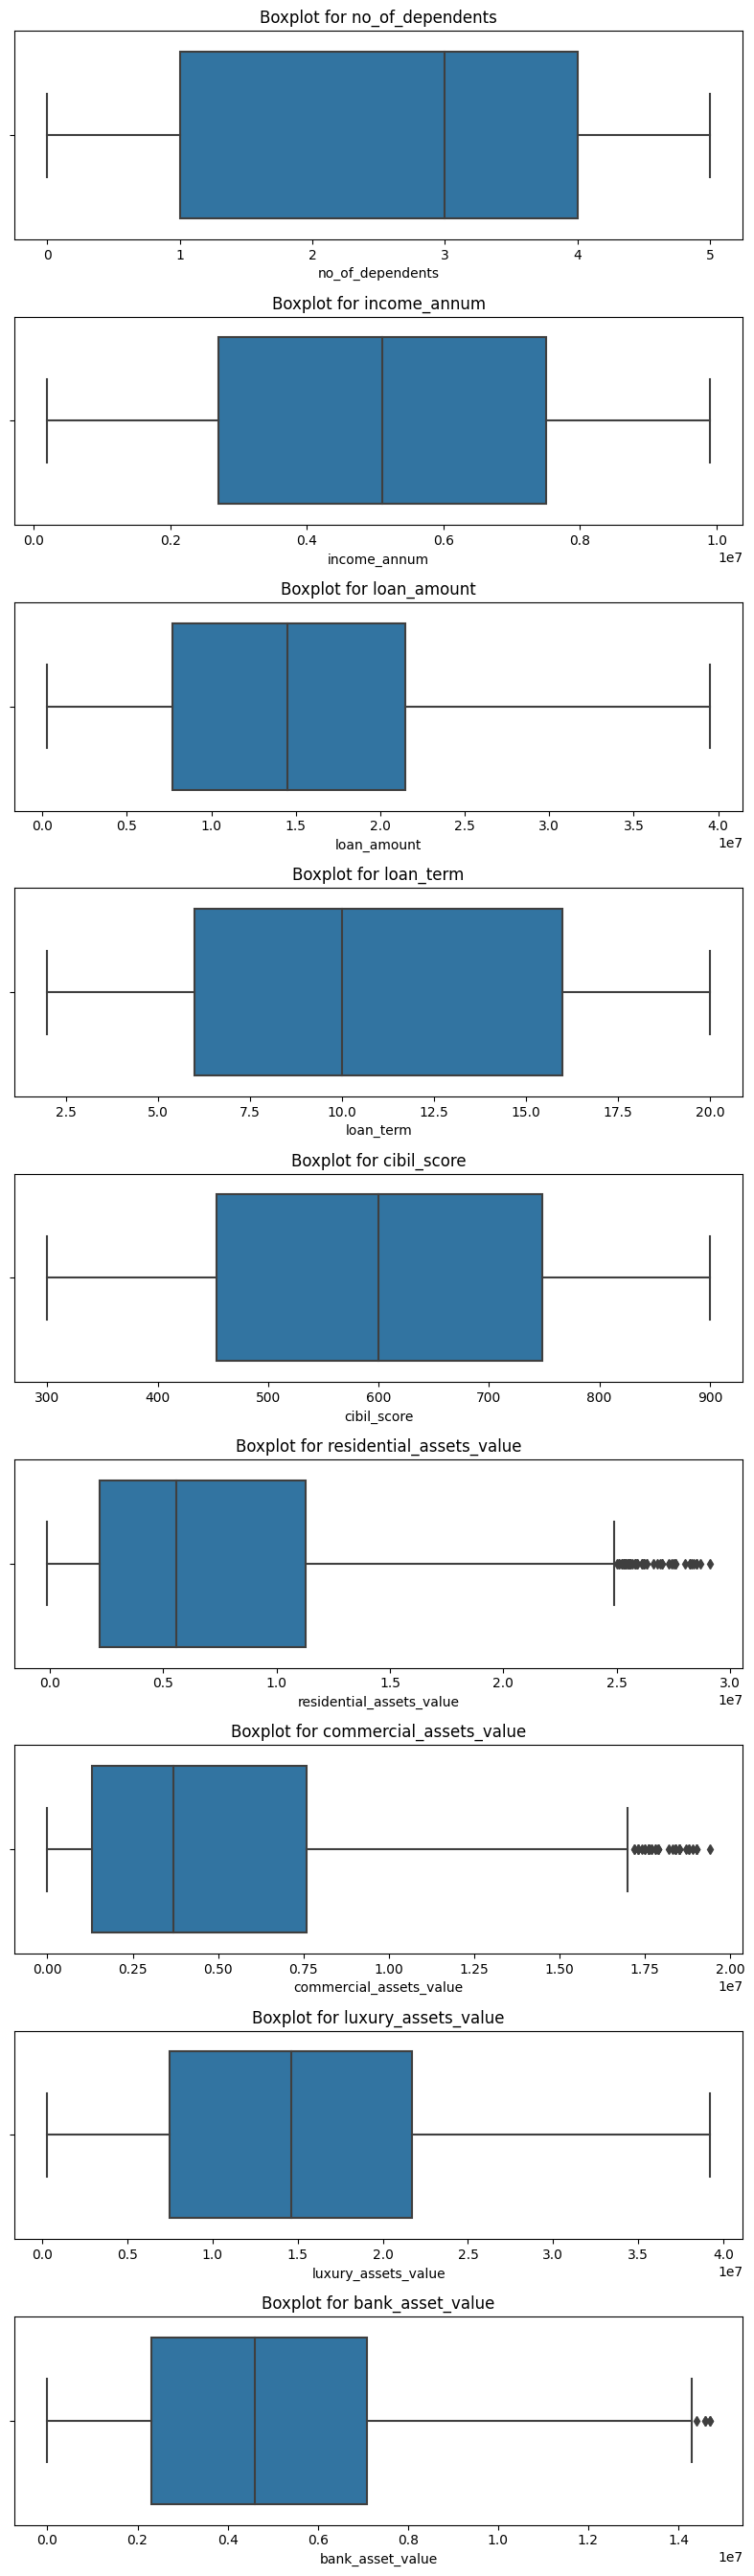

In [15]:
fig, axes = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(8, 3 * len(num_cols)))

# Create boxplots for each selected column
for i, column in enumerate(num_cols):
    sns.boxplot(x=data[column], ax=axes[i])
    axes[i].set_title(f'Boxplot for {column}')

# Adjust layout
plt.tight_layout()
plt.show()

In [16]:
columns_of_interest = ['residential_assets_value', 'commercial_assets_value', 'bank_asset_value']


In [17]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    # Calculate the interquartile range (IQR)
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define a threshold for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (data[col] < lower_bound) | (data[col] > upper_bound)

    # Replace outliers with the mean of the column
    data.loc[outliers, col] = data[col].mean()

# Print the DataFrame after removing outliers
print("DataFrame after removing outliers:")
print(data)

DataFrame after removing outliers:
      no_of_dependents      education self_employed  income_annum  \
0                  2.0       Graduate            No     9600000.0   
1                  0.0   Not Graduate           Yes     4100000.0   
2                  3.0       Graduate            No     9100000.0   
3                  3.0       Graduate            No     8200000.0   
4                  5.0   Not Graduate           Yes     9800000.0   
...                ...            ...           ...           ...   
4264               5.0       Graduate           Yes     1000000.0   
4265               0.0   Not Graduate           Yes     3300000.0   
4266               2.0   Not Graduate            No     6500000.0   
4267               1.0   Not Graduate            No     4100000.0   
4268               1.0       Graduate            No     9200000.0   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
0      29900000.0       12.0        778.0                 2400000

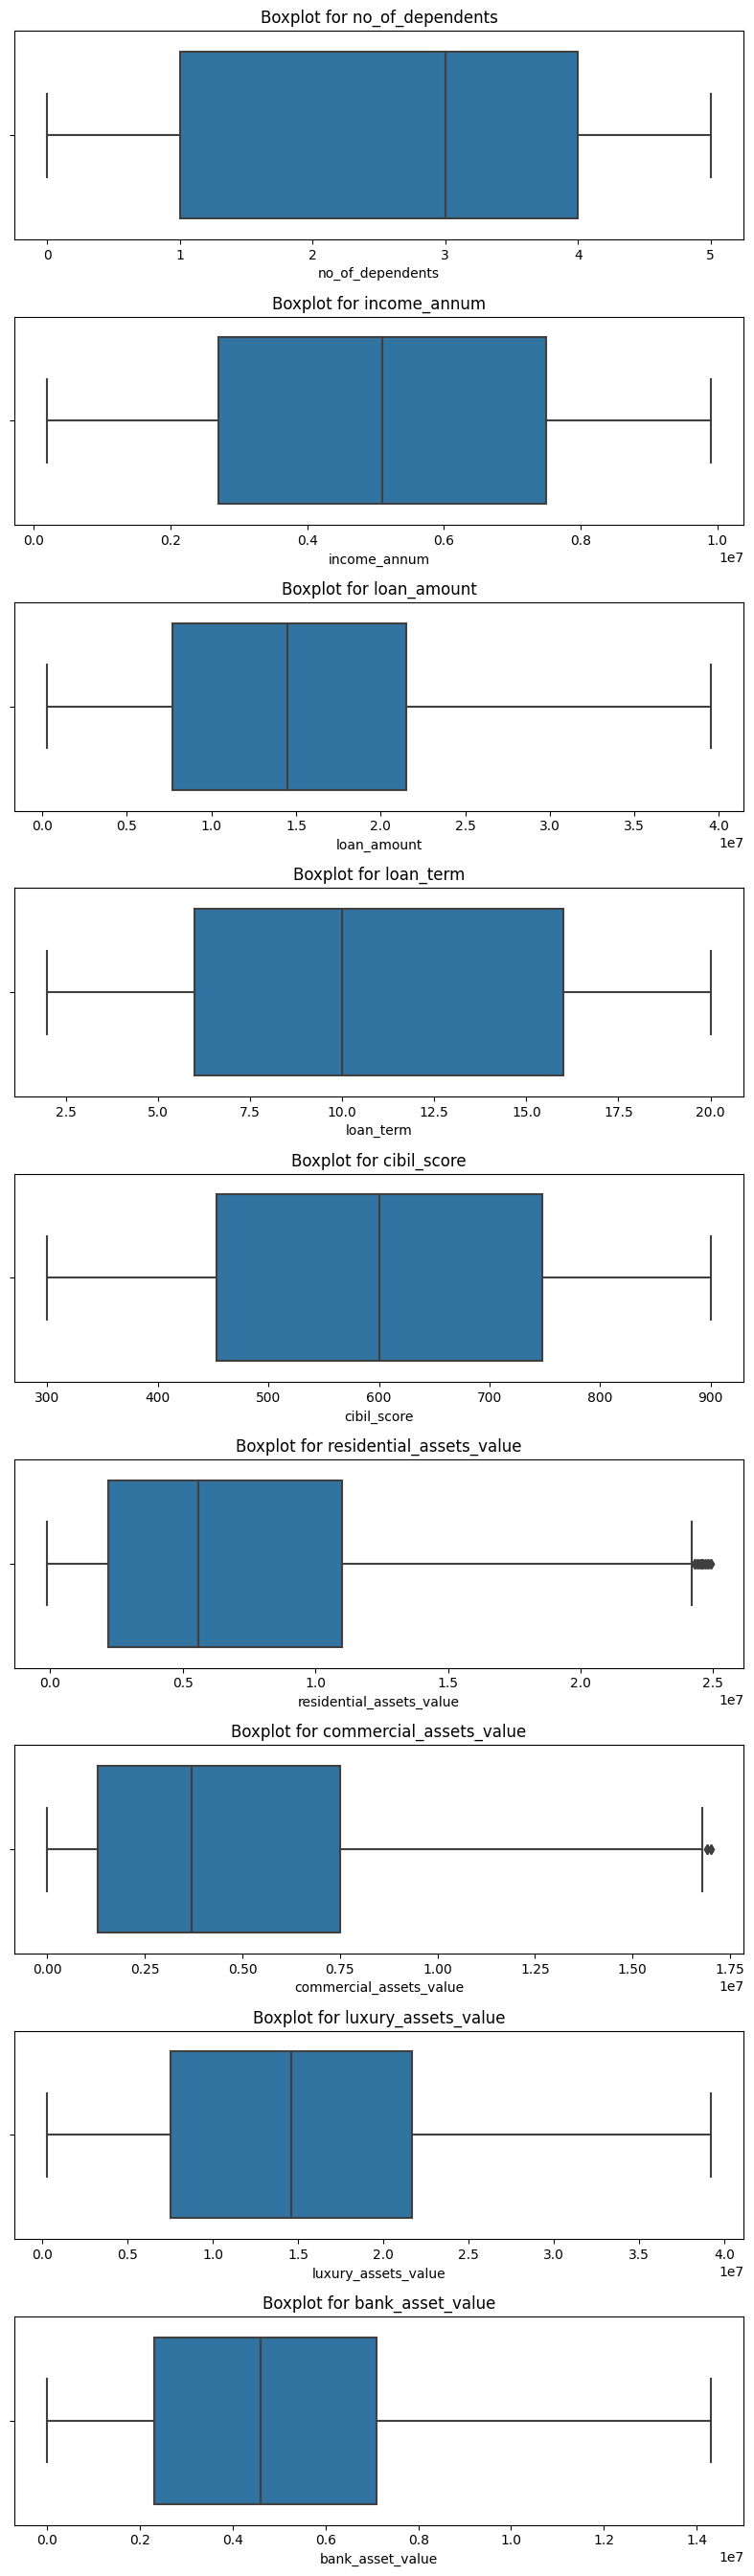

In [18]:
fig, axes = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(8, 3 * len(num_cols)))

# Create boxplots for each selected column
for i, column in enumerate(num_cols):
    sns.boxplot(x=data[column], ax=axes[i])
    axes[i].set_title(f'Boxplot for {column}')

# Adjust layout
plt.tight_layout()
plt.show()

Correlation Matrix:
                          no_of_dependents  income_annum  loan_amount  \
no_of_dependents                  1.000000      0.007266    -0.003366   
income_annum                      0.007266      1.000000     0.927470   
loan_amount                      -0.003366      0.927470     1.000000   
loan_term                        -0.020111      0.011488     0.008437   
cibil_score                      -0.009998     -0.023034    -0.017035   
residential_assets_value          0.009000      0.616271     0.584049   
commercial_assets_value          -0.002267      0.623897     0.585730   
luxury_assets_value               0.002817      0.929145     0.860914   
bank_asset_value                  0.010182      0.849564     0.787601   

                          loan_term  cibil_score  residential_assets_value  \
no_of_dependents          -0.020111    -0.009998                  0.009000   
income_annum               0.011488    -0.023034                  0.616271   
loan_amount    

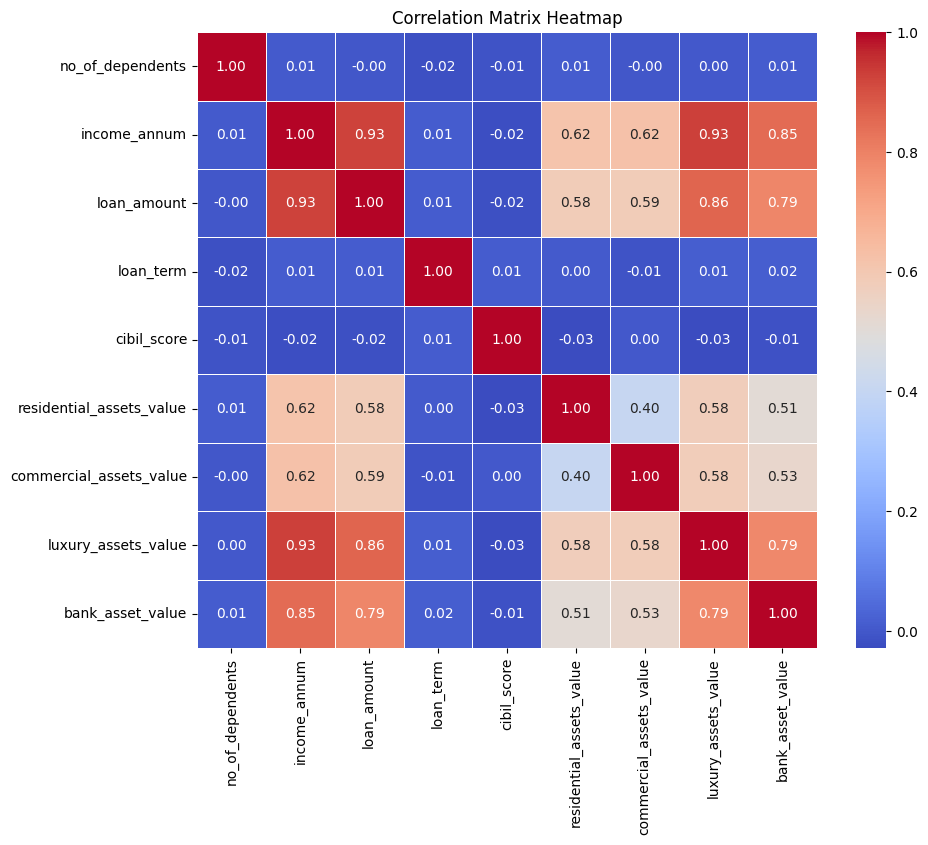

In [19]:
# Calculate the correlation matrix
correlation_matrix = data[num_cols].corr()

# Print or visualize the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [20]:
from sklearn.preprocessing import LabelEncoder
# Specify the categorical columns to be label encoded
cat_cols = ['education', 'self_employed','loan_status']

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each selected column
for col in cat_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   no_of_dependents          4269 non-null   float64
 1   education                 4269 non-null   int64  
 2   self_employed             4269 non-null   int64  
 3   income_annum              4269 non-null   float64
 4   loan_amount               4269 non-null   float64
 5   loan_term                 4269 non-null   float64
 6   cibil_score               4269 non-null   float64
 7   residential_assets_value  4269 non-null   float64
 8   commercial_assets_value   4269 non-null   float64
 9   luxury_assets_value       4269 non-null   float64
 10  bank_asset_value          4269 non-null   float64
 11  loan_status               4269 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 400.3 KB


In [22]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2.0,0,0,9600000.0,29900000.0,12.0,778.0,2400000.0,4.973155e+06,22700000.0,8000000.0,0
1,0.0,1,1,4100000.0,12200000.0,8.0,417.0,2700000.0,2.200000e+06,8800000.0,3300000.0,1
2,3.0,0,0,9100000.0,29700000.0,20.0,506.0,7100000.0,4.500000e+06,33300000.0,12800000.0,1
3,3.0,0,0,8200000.0,30700000.0,8.0,467.0,18200000.0,3.300000e+06,23300000.0,7900000.0,1
4,5.0,1,1,9800000.0,24200000.0,20.0,382.0,12400000.0,8.200000e+06,29400000.0,5000000.0,1


In [23]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Print or visualize the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                          no_of_dependents  education  self_employed  \
no_of_dependents                  1.000000  -0.002697       0.000765   
education                        -0.002697   1.000000       0.023224   
self_employed                     0.000765   0.023224       1.000000   
income_annum                      0.007266  -0.011625       0.002368   
loan_amount                      -0.003366  -0.010631       0.001450   
loan_term                        -0.020111   0.008417       0.004107   
cibil_score                      -0.009998   0.004649      -0.004866   
residential_assets_value          0.009000  -0.017523       0.008641   
commercial_assets_value          -0.002267   0.000277      -0.022431   
luxury_assets_value               0.002817  -0.012471       0.004413   
bank_asset_value                  0.010182  -0.011580       0.000536   
loan_status                       0.018114   0.004918      -0.000345   

                          income_annum  loa

In [24]:
y = data['loan_status']
X = data.drop(['loan_status'], axis =1)

In [25]:
print(data['loan_status'].value_counts())

0    2656
1    1613
Name: loan_status, dtype: int64


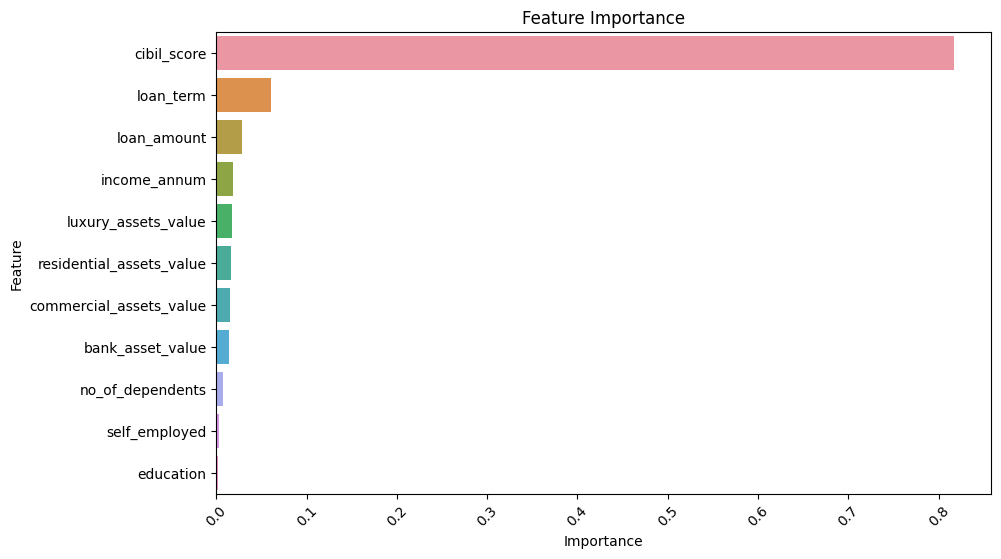

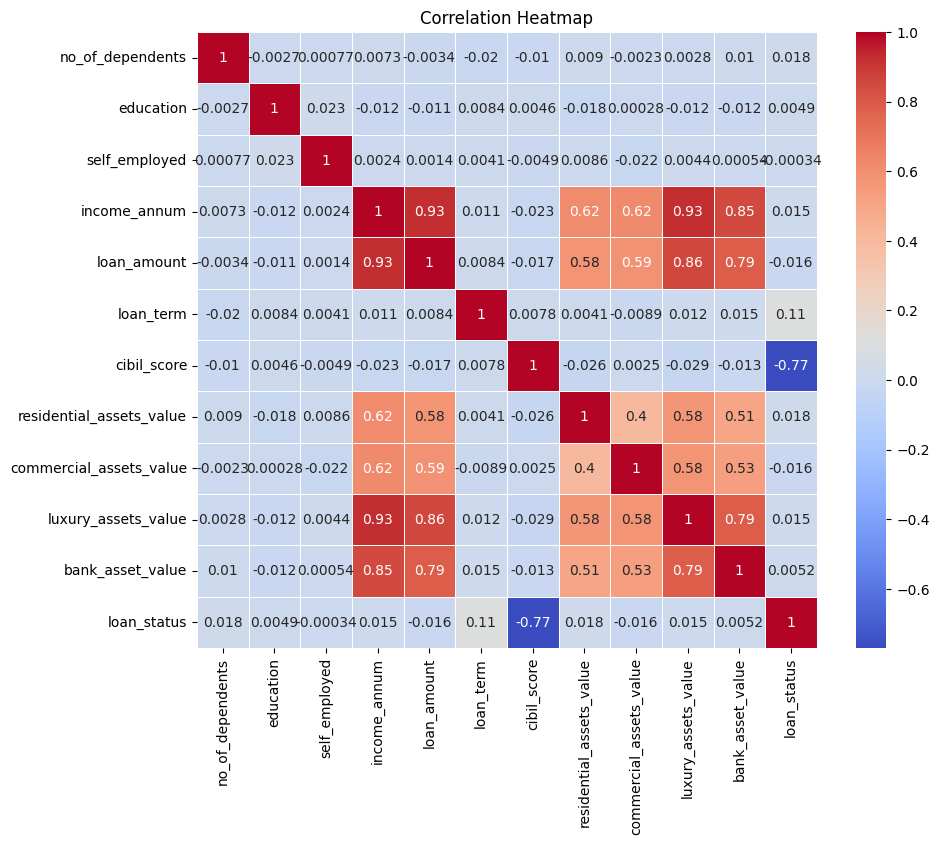

Selected Features based on Feature Importance:
['cibil_score', 'loan_term', 'loan_amount', 'income_annum', 'luxury_assets_value', 'residential_assets_value', 'commercial_assets_value', 'bank_asset_value', 'no_of_dependents', 'self_employed']

Selected Features based on Correlation Analysis:
['bank_asset_value', 'luxury_assets_value', 'no_of_dependents', 'income_annum', 'loan_term', 'cibil_score', 'loan_amount', 'education', 'commercial_assets_value', 'loan_status', 'residential_assets_value', 'self_employed']


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Feature Importance using Random Forest Classifier
clf = RandomForestClassifier(n_estimators=500, random_state=42)
clf.fit(X, y)
feature_importance = clf.feature_importances_

# Create a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

# Select the top N features based on importance
top_n = 10  # Change this to the number of top features you want to select
selected_features = feature_importance_df['Feature'][:top_n]

# Correlation Analysis
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Select the features with a high absolute correlation with the target variables
correlation_threshold = 0.1  # Change this to the desired correlation threshold
correlated_features = correlation_matrix[abs(correlation_matrix) > correlation_threshold].stack().index.tolist()
selected_correlated_features = list(set([item[0] for item in correlated_features] + [item[1] for item in correlated_features]))

# Selected Features
selected_features = selected_features.tolist()
selected_correlated_features = selected_correlated_features

print("Selected Features based on Feature Importance:")
print(selected_features)

print("\nSelected Features based on Correlation Analysis:")
print(selected_correlated_features)


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Combine selected features from feature importance and correlation analysis
final_selected_features = list(set(selected_features + selected_correlated_features))

# Remove 'loan_status' from the selected features if it's present
final_selected_features = [feature for feature in final_selected_features if feature != 'loan_status']

# Create a new DataFrame with the selected features
X_selected = X[final_selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize and train different machine learning models for each target variable
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
}

for model_name, model in models.items():
    # Train the model for the target variable
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics for the target variable
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Print evaluation metrics for the target variable
    print(f'Evaluation Metrics for {model_name} - ')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print(f'ROC AUC: {roc_auc:.2f}\n')


Evaluation Metrics for Logistic Regression - 
Accuracy: 0.63
Precision: 0.44
Recall: 0.01
F1 Score: 0.02
ROC AUC: 0.50

Evaluation Metrics for Decision Tree - 
Accuracy: 0.98
Precision: 0.97
Recall: 0.97
F1 Score: 0.97
ROC AUC: 0.98

Evaluation Metrics for Random Forest - 
Accuracy: 0.98
Precision: 0.98
Recall: 0.96
F1 Score: 0.97
ROC AUC: 0.98



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluation Metrics for Support Vector Machine - 
Accuracy: 0.63
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
ROC AUC: 0.50

Evaluation Metrics for Neural Network - 
Accuracy: 0.60
Precision: 0.43
Recall: 0.25
F1 Score: 0.32
ROC AUC: 0.53



In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Define hyperparameter grids for different models
param_grid = {
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
    },

}

# Initialize and perform Grid Search for hyperparameter optimization
for model_name, model in models.items():
    if model_name in param_grid:
        clf = GridSearchCV(model, param_grid[model_name], cv=5)
        clf.fit(X_train, y_train)
        best_model = clf.best_estimator_
    else:
        best_model = model

    # Train the best model for the target variable
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)

    # Calculate and print evaluation metrics for the best model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Best Model Metrics for {model_name} - ')
    print(f'Best Model Accuracy: {accuracy:.2f}\n')


Best Model Metrics for Logistic Regression - 
Best Model Accuracy: 0.63

Best Model Metrics for Decision Tree - 
Best Model Accuracy: 0.98

Best Model Metrics for Random Forest - 
Best Model Accuracy: 0.98

Best Model Metrics for Support Vector Machine - 
Best Model Accuracy: 0.63

Best Model Metrics for Neural Network - 
Best Model Accuracy: 0.39



In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming X is the DataFrame with your features and y is the target variable

# Combine selected features from feature importance and correlation analysis
final_selected_features = list(set(selected_features + selected_correlated_features))

# Remove 'loan_status' from the selected features if it's present
final_selected_features = [feature for feature in final_selected_features if feature != 'loan_status']

# Create a new DataFrame with the selected features
X_selected = X[final_selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier on the selected features
clf_selected = RandomForestClassifier(n_estimators=500, random_state=42)
clf_selected.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf_selected.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy on Test Set: {accuracy * 100:.2f}%")


Model Accuracy on Test Set: 97.89%


In [30]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score

# Assuming X is the DataFrame with your features and y is the target variable

# Combine selected features from feature importance and correlation analysis
final_selected_features = list(set(selected_features + selected_correlated_features))

# Remove 'loan_status' from the selected features if it's present
final_selected_features = [feature for feature in final_selected_features if feature != 'loan_status']

# Create a new DataFrame with the selected features
X_selected = X[final_selected_features]

# Initialize the Random Forest Classifier
clf_selected = RandomForestClassifier(n_estimators=500, random_state=42)

# Define a stratified k-fold cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_accuracy = cross_val_score(clf_selected, X_selected, y, cv=cv, scoring=make_scorer(accuracy_score))

# Print cross-validation results
print(f"Cross-Validation Accuracy: {cv_accuracy.mean() * 100:.2f}% +/- {cv_accuracy.std() * 100:.2f}%")

# Train the model on the full training set
clf_selected.fit(X_selected, y)

# Make predictions on the test set
y_pred = clf_selected.predict(X_test)

# Evaluate the model performance on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy on Test Set: {test_accuracy * 100:.2f}%")


Cross-Validation Accuracy: 98.41% +/- 0.34%
Model Accuracy on Test Set: 100.00%


In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate additional metrics on the test set
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print additional metrics
print(f"Precision on Test Set: {precision * 100:.2f}%")
print(f"Recall on Test Set: {recall * 100:.2f}%")
print(f"F1 Score on Test Set: {f1 * 100:.2f}%")


Precision on Test Set: 100.00%
Recall on Test Set: 100.00%
F1 Score on Test Set: 100.00%


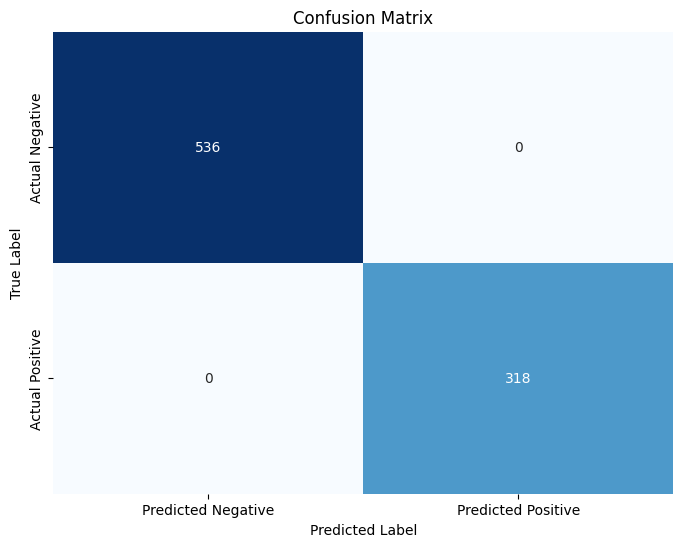

In [32]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Important Feature:Selected Features based on Correlation Analysis:
['bank_asset_value', 'luxury_assets_value', 'commercial_assets_value', 'cibil_score', 'income_annum', 'loan_term', 'residential_assets_value', 'education', 'no_of_dependents', 'loan_amount', 'self_employed']

Random Forest Accuracy
For Train Set: 100
For Test Set: 98.36